## TNG300-1 Profiles
#### This notebook aims to produce the stellar mass density profiles of central galaxies drawn from the TNG300-1 simulation.

#### **Data files and organization**

1. Create an environment variable `$TNG_DATA` pointing to the top-level directory of the Illustris data and choose a simulation, for example TNG300-1. Next, create the directory structure you need (see also the tutorial for more, potentially confusing, details):

    cd $TNG_DATA  
    mkdir TNG300-1  
    mkdir TNG300-1/output  
    mkdir -p TNG300-1/postprocessing/offsets  

2. From the top-level page for this simulation, e.g., http://www.tng-project.org/data/downloads/TNG300-1:

    2a. Grab the appropriate simulation.hdf5 file.  
    2b. Choose a snapshot number, typically the one corresponding to z=0 (here, equal to snapshot-99), and download the appropriate offsets_099.hdf5 file into the postprocessing/offsets directory.  
    2c. Grab all the group catalogs for this snapshot and put them into the output/groups_099 directory.



You should modify your basePath as necessary to point to your local files, however you have organized them. By default they assume the following directory structure: (e.g for snapshot 99):  
* group catalogs: `basePath/groups_099/groups_099.N.hdf5`

* snapshots:  `basePath/snapdir_099/snap_099.N.hdf5`   

**Initial imports**

In [1]:
import os, time
import illustris_python as il
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from astropy.table import Table, Column

In [2]:
import requests

baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key":"e74bff8a3f17fa1497eb8c11243b2b87"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

### Read all the subhalos in snapshot 99 (corresponding to z=0).

* http://www.tng-project.org/data/downloads/TNG300-1/
* http://www.tng-project.org/data/docs/specifications/#sec1a
        
Every HDF5 snapshot contains several groups: "Header", "Parameters", "Configuration", and five 
"PartTypeX" groups, for the following particle types (the DM only runs have a single PartType1 group):

    PartType0 - GAS
    PartType1 - DM
    PartType2 - (unused)
    PartType3 - TRACERS
    PartType4 - STARS & WIND PARTICLES
    PartType5 - BLACK HOLES

**There are two requirements to use a simulation.hdf5 file**

* actual data files must be organized exactly as suggested and described in the example scripts tutorial (i.e., an "output" directory containing a "snapdir_099" subdirectory and a "group_099" subdirectory, along with a "postprocessing" directory containing, among others, an "offsets" subdirectory).  
* HDF5 virtual datasets are a new feature, only supported by HDF5 version 1.10.x and later. This is not presently the default version installed on most clusters, which still use 1.8.x. You may have to install a newer version yourself, or request that your system administrator do so. Note! Files created with advanced features of the new HDF5 library series are not backwards compatible. The old 1.8.x series of HDF5 reaches end of life in 2019, so it is a good idea regardless to migrate. In Python, you will also need a fairly new version of h5py (e.g. 2.9.x).


In [3]:
# this is all stuff with the simulation file that we soon came to realize that it just doesn't work with us ,...

In [4]:
#with h5py.File(os.path.join(basepath, 'simulation.hdf5'), 'r') as f:
#    for key in f['Groups/99/Subhalo'].keys():
#        if type(f['Groups/99/Subhalo/{}'.format(key)]) is h5py._hl.dataset.Dataset:
#           print(key, f['Groups/99/Subhalo/{}'.format(key)][()].shape

In [5]:
#ff = h5py.File(os.path.join(basepath, 'simulation.hdf5'), 'r')
#dir(f['Groups/99/Subhalo/SubhaloMass'])
#if type(ff['Groups/99/Subhalo/SubhaloMass']) is h5py._hl.dataset.Dataset:
#    print('Yo')
    #f['Groups/99/Subhalo/SubhaloMass'].len()

In [6]:
#for key in ff['Groups/99/Subhalo/StellarMasses'].keys():
#   print(key, ff['Groups/99/Subhalo/StellarMasses/{}'.format(key)][()].max()) 

In [7]:
#with h5py.File(os.path.join(basepath, 'output', 'groups_099', 'fof_subhalo_tab_099.3.hdf5'), 'r') as f2:
#    print(f2.keys())
#    print(f2['Group'].keys())
#    mm = f2['Subhalo/SubhaloMassInHalfRad']

In [8]:
#basePath = os.path.join(os.getenv('HOME'), 'tng300-1', 'output')
basePath = os.path.join(os.getenv('IM_DATA_DIR'), 'illustris', 'TNG300-1', 'output')
print(basePath)

/Users/ioannis/research/data/illustris/TNG300-1/output


#### Read the FoF group catalog at z=0.

In [9]:
with h5py.File(os.path.join(basePath, 'groups_099', 'fof_subhalo_tab_099.0.hdf5'), 'r') as ff:
    print(ff['Header'])

<HDF5 group "/Header" (0 members)>


In [10]:
def read_groupcat(snapshot=99):
    """Read the fields we care about from a given group catalog in a 
    specified snapshot (redshift).
    
    http://www.tng-project.org/data/docs/specifications/#sec1a
    """
    fields = ['GroupFirstSub', 'GroupMass', 'GroupLenType', 'GroupPos', 
              'Group_M_Crit200', 'Group_M_Crit500', 'Group_R_Crit200', 
              'GroupNsubs', 'GroupSFR', 'GroupMassType']
    print('Reading the following group catalog fields from snapshot {}:'.format(snapshot))
    print(fields)
    cat = il.groupcat.loadHalos(basePath, snapshot, fields=fields)
    return cat

In [11]:
%time groupcat = read_groupcat()

Reading the following group catalog fields from snapshot 99:
['GroupFirstSub', 'GroupMass', 'GroupLenType', 'GroupPos', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_R_Crit200', 'GroupNsubs', 'GroupSFR', 'GroupMassType']
Reading /Users/ioannis/research/data/illustris/TNG300-1/output/groups_099/fof_subhalo_tab_099.0.hdf5
CPU times: user 6.44 s, sys: 1.7 s, total: 8.14 s
Wall time: 9.88 s


For fun, plot the distribution of halo masses for the full group catalog.  We're interested in the most massive ones, >10^13 Msun.

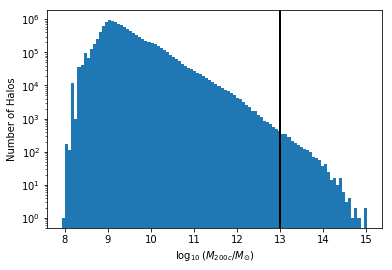

In [13]:
good = groupcat['Group_M_Crit200'] > 0
fig, ax = plt.subplots()
_ = ax.hist(np.log10(groupcat['Group_M_Crit200'][good] * 1e10), bins=100)
ax.set_yscale('log')
ax.set_xlabel(r'$\log_{10}\,(M_{200c}/M_{\odot})$')
ax.set_ylabel('Number of Halos')
ax.axvline(x=13, color='k', lw=2, ls='-')

Scrape the offsets to gather the quantities we need and pack them into a table.

In [58]:
def gather_halo_info(mhalocut=1e14, verbose=False):
    igroup = np.where(groupcat['Group_M_Crit200'] * 1e10 > mhalocut)[0]
    ngroup = len(igroup)
    print('Found {} groups with M>{:g} Msun'.format(ngroup, mhalocut))
    
    # Key fields to track: 
    # SubhaloFlag, SubhaloPos, SubhaloSFR, SubhaloMass, SubhaloLenType
    data = Table()
    data.add_column(Column(name='groupid', length=ngroup, dtype=np.int32))
    data.add_column(Column(name='nsubhalos', length=ngroup, dtype=np.int32))
    data.add_column(Column(name='group_m200c', length=ngroup, dtype='f4'))
    data.add_column(Column(name='group_m500c', length=ngroup, dtype='f4'))
    data.add_column(Column(name='cen_subhaloid', length=ngroup, dtype=np.int32))
    data.add_column(Column(name='cen_mstar_tot', length=ngroup, dtype='f4'))
    data.add_column(Column(name='cen_mstar_half', length=ngroup, dtype='f4'))
    
    data['groupid'] = igroup

    # Types are: 0=gas; 1=DM; 2=not used; 3=tracers; 4=stars/wind; 5=BH
    starsindx = il.snapshot.partTypeNum('stars')  # 4

    fields = ['SubhaloFlag', 'SubhaloPos', 'SubhaloSFR', 'SubhaloMass', 'SubhaloLenType']
    for ii, ig in enumerate(igroup):
        data['nsubhalos'][ii] = groupcat['GroupNsubs'][ig]
        data['cen_subhaloid'][ii] = groupcat['GroupFirstSub'][ig]
        data['group_m200c'][ii] = np.log10(groupcat['Group_M_Crit200'][ig] * 1e10)
        data['group_m500c'][ii] = np.log10(groupcat['Group_M_Crit500'][ig] * 1e10)
        
        if verbose:
            print('Working on subhalo ID {} (out of {} subhalos) in FoF group {}'.format(
                data['cen_subhaloid'][ii], data['nsubhalos'][ii], ig))
        
        subhalo = il.groupcat.loadSingle(basePath, 99, subhaloID=data['cen_subhaloid'][ii])
        data['cen_mstar_tot'][ii] = np.log10(subhalo['SubhaloMassType'][starsindx] * 1e10)
        data['cen_mstar_half'][ii] = np.log10(subhalo['SubhaloMassInRadType'][starsindx] * 1e10)
        
        #print(subhalo.keys())
        if verbose:
            print('  Subhalo mass = {:.3f} (group mass = {:.3f})'.format(
                data['cen_mstar_tot'][ii], data['group_m200c'][ii]))

    return data

In [59]:
%time data = gather_halo_info()
data

Found 153 groups with M>1e+14 Msun
CPU times: user 4.05 s, sys: 300 ms, total: 4.35 s
Wall time: 4.36 s


groupid,nsubhalos,group_m200c,group_m500c,cen_subhaloid,cen_mstar_tot,cen_mstar_half
int64,int32,float32,float32,int32,float32,float32
0,11748,15.017177,14.893454,0,12.725052,12.547521
1,6160,14.947234,14.8150425,11748,12.576932,12.409057
2,4828,14.8450775,14.678097,17908,12.514579,12.289819
3,5142,14.784928,14.630985,22736,12.431301,12.253589
4,5296,14.756064,14.608318,27878,12.442984,12.268674
5,4318,14.696261,14.423792,33174,12.265059,12.052548
6,5139,14.492928,14.312362,37492,12.123277,11.979688
7,4684,14.595186,14.408698,42631,12.280957,12.095582
8,4197,14.431003,14.300912,47315,12.216147,12.051734


#### Just the data that is above 10^14 (same as Annalisa's paper)

In [67]:
def qa_mstar_mhalo(data):
    """Plot central-galaxy stellar mass vs halo mass (cf Fig XX in Pillepich et al. 2018).
    
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    _ = ax.plot(data['group_m500c'], data['cen_mstar_tot'], 'b.', label = 'Total')
    _ = ax.plot(data['group_m500c'], data['cen_mstar_half'], 'c.', label='< 2 x r_{stars, 1/2}')
    ax.legend(loc='upper left')
    ax.set_xlabel('M(500c) Mass')
    ax.set_ylabel('M*(central galaxy)')
    ax.set_xlim([13, 15.3])
    ax.set_ylim([10.7, 13.3])
    #plt.savefig('StellarMassvsTotalMass')

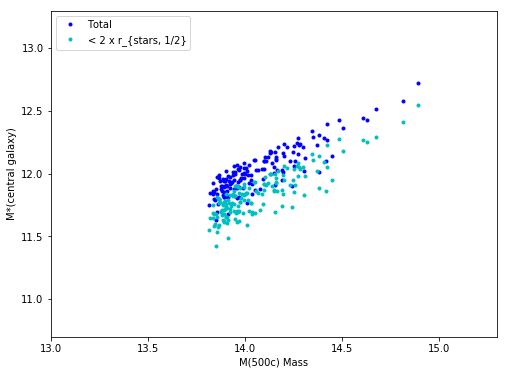

In [68]:
qa_mstar_mhalo(data)

In [ ]:
# so for the rest of her graph -- you need different apertures - and these happen to be in simulation.hdf5 file:

In [ ]:
stop

In [ ]:
basepath = '/home/desi/tng300-1'

In [ ]:
ff = h5py.File(os.path.join(basepath, 'simulation.hdf5'), 'r')
#dir(f['Groups/99/Subhalo/SubhaloMass'])
if type(ff['Groups/99/Subhalo/SubhaloMass']) is h5py._hl.dataset.Dataset:
    print('Yo')
    #f['Groups/99/Subhalo/SubhaloMass'].len()

In [ ]:
for key in ff['Groups/99/Subhalo/StellarMasses'].keys():
    print(key, ff['Groups/99/Subhalo/StellarMasses/{}'.format(key)][()].max())

For the five most massive subhalos, load all their fields from the group catalog and print a gas function (gas mass over total baryonic mass) in the stellar half mass radius.

In [ ]:
GroupFirstSub = il.groupcat.loadHalos(basePath,99, fields=['GroupFirstSub'])

In [ ]:
ptNumGas = il.snapshot.partTypeNum('gas')  # 0
ptNumStars = il.snapshot.partTypeNum('stars')  # 4
stellarmass = []
gasmass = []
totalmass = []
central_galaxies = []

for i in range(5):
    all_fields = il.groupcat.loadSingle(basePath, 99, subhaloID=GroupFirstSub[i])
    gas_mass = all_fields['SubhaloMassInHalfRadType'][ptNumGas]
    stars_mass = all_fields['SubhaloMassInHalfRadType'][ptNumStars]
    frac = gas_mass / (gas_mass + stars_mass)
    total_mass = all_fields['SubhaloMass']
    stellarmass.append(stars_mass)
    gasmass.append(gas_mass)
    totalmass.append(total_mass)
    central_galaxies.append(GroupFirstSub[i])
    print(GroupFirstSub[i])

In [ ]:
subhalo_mass = []
subhalo_position = []
subhalo_sfr = []
subhalo_masstype = []
subhalo_metallicity = []
subhalo_cm = []
subhalo_pos = []

for c in central_galaxies:
    snap_url = "http://www.tng-project.org/api/TNG300-1/snapshots/99/subhalos/"+str(c)+"/info.json"
    snap = get(snap_url)
    subhalo_mass.append(snap['SubhaloMass'])
    subhalo_position.append(snap['SubhaloPos'])
    subhalo_sfr.append(snap['SubhaloSFR'])
    subhalo_masstype.append(snap['SubhaloMassType'])
    subhalo_metallicity.append(snap['SubhaloGasMetallicity'])
    subhalo_cm.append(snap['SubhaloCM'])
    subhalo_pos.append(snap['SubhaloPos']) 

In [ ]:
subhalo_pos

download individual [cutout](http://www.tng-project.org/data/search/?sim=TNG300-1&snap=99&snap_num=&form-TOTAL_FORMS=1&form-INITIAL_FORMS=1&form-MIN_NUM_FORMS=0&form-MAX_NUM_FORMS=1000&form-0-field=id&form-0-min=0&form-0-max=11749) that you want 

In [ ]:
#f0 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_0.hdf5')
#f1 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_11748.hdf5')
f2 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_17908.hdf5')
#f3 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_22736.hdf5')
#f4 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_27878.hdf5')

In [ ]:
%time coordinates = np.array(list(f2['PartType4/Coordinates'][:100000]))

In [ ]:
stellar_masses = np.array(list(f2['PartType4/Masses'][:100000]))

In [ ]:
radius = []
central_galaxy = subhalo_pos[2]

for c in range(10000):
    x = coordinates[c][0]-central_galaxy[0]
    y = coordinates[c][1]-central_galaxy[1]
    z = coordinates[c][2]-central_galaxy[2]
    
    radius.append(np.sqrt(x**2 + y**2 + z**2))

In [ ]:
len(radius)

In [ ]:
sum_stellar_mass = []
for r in range(0,len(radius)):
    ww = np.where(radius<radius[r])
    new_stellar_mass = stellar_masses
    summed_mass = np.sum(new_stellar_mass[ww])
    sum_stellar_mass.append(summed_mass)

In [ ]:
len(sum_stellar_mass)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(radius, sum_stellar_mass, 'b.')
plt.title('Stellar Mass vs. Radius',fontsize=16)
plt.xlabel('Radius (ckpc/h)',fontsize=16)
plt.ylabel('Stellar Mass (10^10 Msol/h)',fontsize=16)
plt.grid()
#plt.savefig('stellarmass_v_rad.png')

In [ ]:
# close the file so we don't waste resources
f2.close()

### Everything from here below is just me messing around with stuff and talking to myself 

In [ ]:
# kay so now try to push to a function so we can overlay the different galaxies 

In [ ]:
# so we need coordinates and mass from each galaxy 
# each subhalo_pos[x] correlates to a different galaxy
# subhalo_pos[0] = f0, subhalo_pos[1] = f1 and so on and so forth

In [ ]:
# figure out how to input the different ID ? or different fN
# so loop over 5 of them and get coordinates and stellar_masses
# however it takes forever to load coordinates and stellar_masses so until we 
# have better resources -- we are grabbing only 100000 (idk why this took me forever to figure out)

In [ ]:
rad = []
cengal = subhalo_pos[0]
def get_radius(f):
    coordinates = np.array(list(f['PartType4/Coordinates'][:100000, :]))
    for c in range(10000):
        x = coordinates[c][0]-cengal[0]
        y = coordinates[c][1]-cengal[1]
        z = coordinates[c][2]-cengal[2]
    
        rad.append(np.sqrt(x**2 + y**2 + z**2))
    return rad

In [ ]:
sum_stellar_mass = []
def get_stellar_mass(f):
    stellar_masses = np.array(list(f['PartType4/Masses'][:100000]))   
    radius = get_radius(f)
    for r in range(0, len(radius)):       
        ww = np.where(radius<radius[r])
        new_stellar_mass = stellar_masses
        summed_mass = np.sum(new_stellar_mass[ww])
        sum_stellar_mass.append(summed_mass)
    return sum_stellar_mass

In [ ]:
def plot(f):
    sum_stellar_mass = get_stellar_mass(f)
    radius = get_radius(f)
    plt.figure(figsize=(15,10))
    plt.plot(radius, sum_stellar_mass, 'b.')
    plt.title('Stellar Mass vs. Radius',fontsize=16)
    plt.xlabel('Radius (ckpc/h)',fontsize=16)
    plt.ylabel('Stellar Mass (10^10 Msol/h)',fontsize=16)
    plt.grid()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(radius, sum_stellar_mass, 'b.')
plt.title('Stellar Mass vs. Radius',fontsize=16)
plt.xlabel('Radius (ckpc/h)',fontsize=16)
plt.ylabel('Stellar Mass (10^10 Msol/h)',fontsize=16)
plt.grid()

#### stellar mass as a function of total mass

In [ ]:
f1 = h5py.File('/home/desi/tng300-1/output/groups_099/cutout_11748.hdf5')
coordinates = np.array(list(f1['PartType4/Coordinates'][:10000]))
stellar_masses = np.array(list(f1['PartType4/Masses'][:10000]))